In [3]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "IA-2024-1/eje" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/InteligenciaArtificial/ai-uis-student


In [4]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.0.3'

In [5]:
df = pd.read_csv('Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20240312 (2).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914849 entries, 0 to 5914848
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   CodigoSensor       int64  
 2   FechaObservacion   object 
 3   ValorObservado     float64
 4   NombreEstacion     object 
 5   Departamento       object 
 6   Municipio          object 
 7   ZonaHidrografica   object 
 8   Latitud            float64
 9   Longitud           float64
 10  DescripcionSensor  object 
 11  UnidadMedida       object 
dtypes: float64(3), int64(2), object(7)
memory usage: 541.5+ MB


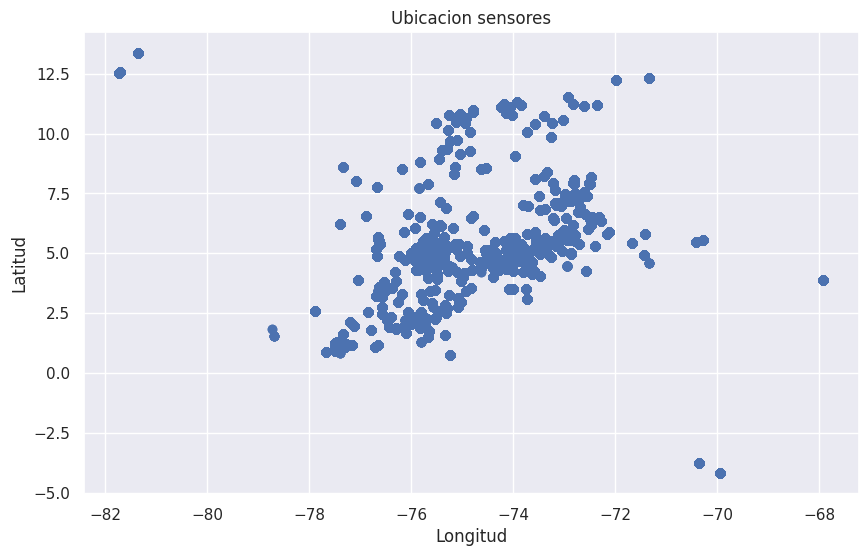

In [ ]:
#@title **Ubicacion sensores**
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitud'], df['Latitud'])
plt.title('Ubicacion sensores')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)


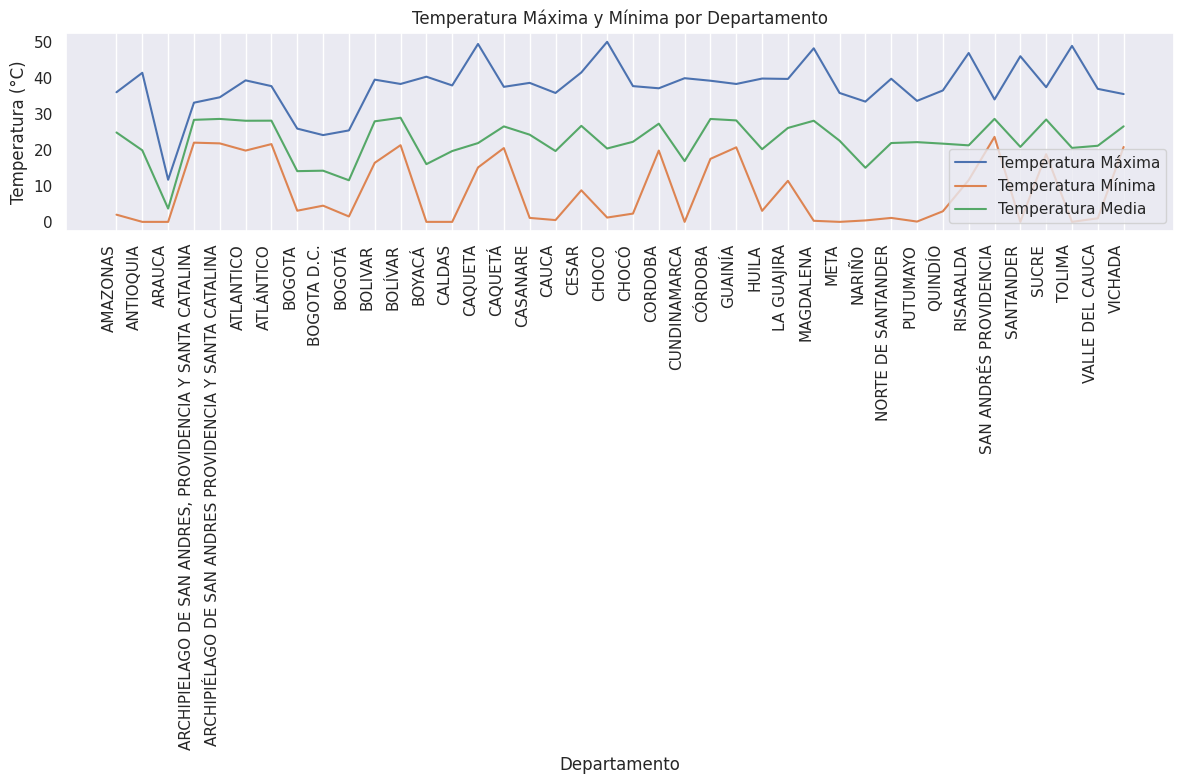

In [ ]:
#@title **Grafica Máxima,Mínima,Media**
temperaturas_dept = df.groupby('Departamento').agg({'ValorObservado': ['max', 'min' , 'mean']}).reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
index = range(len(temperaturas_dept))
bar_width = 0.35


plt.plot(index, temperaturas_dept['ValorObservado']['max'], label='Temperatura Máxima')
plt.plot(index, temperaturas_dept['ValorObservado']['min'], label='Temperatura Mínima')
plt.plot(index, temperaturas_dept['ValorObservado']['mean'], label='Temperatura Media')


plt.xlabel('Departamento')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Máxima y Mínima por Departamento')
plt.xticks(index, temperaturas_dept['Departamento'], rotation=90, ha='right')
plt.legend()
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

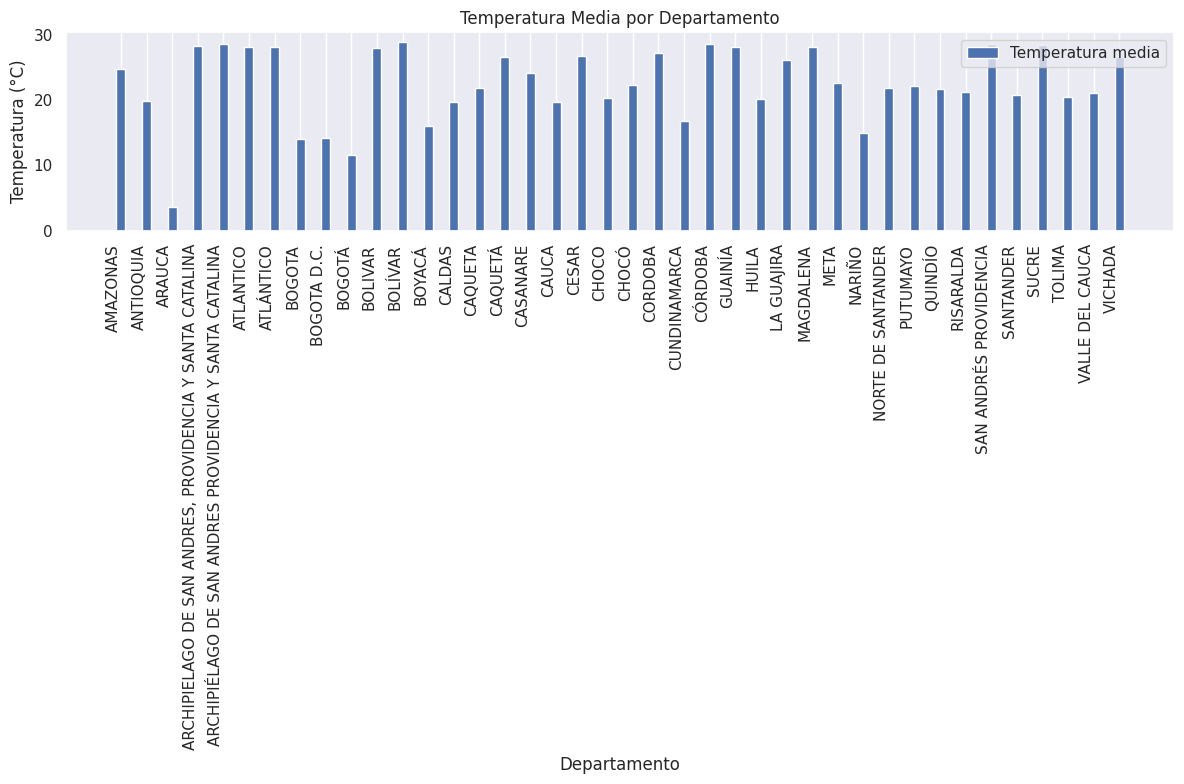

In [ ]:
#@title **Grafica Temperatura Media**
temperaturas_dept = df.groupby('Departamento').agg({'ValorObservado': ['max', 'min' , 'mean']}).reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
index = range(len(temperaturas_dept))
bar_width = 0.35


plt.bar(index, temperaturas_dept['ValorObservado']['mean'], bar_width, label='Temperatura media')

plt.xlabel('Departamento')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Media por Departamento')
plt.xticks(index, temperaturas_dept['Departamento'], rotation=90, ha='right')
plt.legend()
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-8-ac5a6ad8c31c>:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], infer_datetime_format=True, errors='coerce')
<ipython-input-8-ac5a6ad8c31c>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], infer_datetime_format=True, errors='coerce')


Epoch 1/10
118297/118297 [==============================] - 330s 3ms/step - loss: 15.6493 - val_loss: 8.9705
Epoch 2/10
118297/118297 [==============================] - 370s 3ms/step - loss: 10.5484 - val_loss: 8.1960
Epoch 3/10
118297/118297 [==============================] - 334s 3ms/step - loss: 10.1492 - val_loss: 8.0628
Epoch 4/10
118297/118297 [==============================] - 351s 3ms/step - loss: 9.5902 - val_loss: 6.6819
Epoch 5/10
118297/118297 [==============================] - 391s 3ms/step - loss: 8.9099 - val_loss: 6.4746
Epoch 6/10
118297/118297 [==============================] - 344s 3ms/step - loss: 8.8509 - val_loss: 6.4443
Epoch 7/10
118297/118297 [==============================] - 346s 3ms/step - loss: 8.7651 - val_loss: 6.3834
Epoch 8/10
118297/118297 [==============================] - 340s 3ms/step - loss: 8.7226 - val_loss: 6.3901
Epoch 9/10
118297/118297 [==============================] - 349s 3ms/step - loss: 8.7187 - val_loss: 6.2877
Epoch 10/10
36968/36968 [

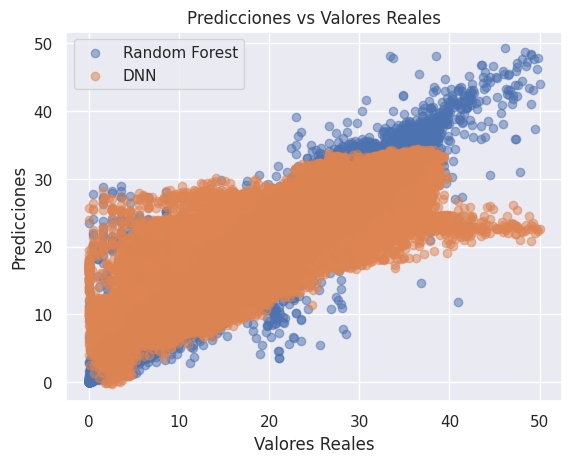

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Cargar los datos
df = pd.read_csv('Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20240312 (2).csv')

# Convertir la columna 'FechaObservacion' a tipo datetime con inferencia de formato
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], infer_datetime_format=True, errors='coerce')

# Eliminar filas con fechas no convertidas
df = df.dropna(subset=['FechaObservacion'])

# Extraer características temporales de la fecha de observación
df['Año'] = df['FechaObservacion'].dt.year
df['Mes'] = df['FechaObservacion'].dt.month
df['Día'] = df['FechaObservacion'].dt.day
df['Hora'] = df['FechaObservacion'].dt.hour
df['Minuto'] = df['FechaObservacion'].dt.minute

# Seleccionar características relevantes
features = ['Año', 'Mes', 'Día', 'Hora', 'Minuto', 'Latitud', 'Longitud']
X = df[features]
y = df['ValorObservado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de la Red Neuronal Profunda (DNN)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Salida para regresión

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(),  # Cambia el optimizador si es necesario
              loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo
y_pred_dnn = model.predict(X_test)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

print(f'DNN - Error Cuadrático Medio (MSE): {mse_dnn}')
print(f'DNN - Coeficiente de Determinación (R^2): {r2_dnn}')

# Entrenar y evaluar el modelo RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, max_depth=100, random_state=21)
regressor.fit(X_train, y_train)
y_pred_rf = regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - Error Cuadrático Medio (MSE): {mse_rf}')
print(f'Random Forest Regressor - Coeficiente de Determinación (R^2): {r2_rf}')

# Graficar los resultados del modelo RandomForestRegressor y DNN
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_dnn, alpha=0.5, label='DNN')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()
